<a href="https://colab.research.google.com/github/Steve-YJ/Colab_Exercise/blob/master/Post_Info_Exp02_make_latent_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# README.MD
* Post-InfoSec-Exp02<br>
    ✅ Complete
    * Makedir-automatically
        * e.g) Post_Exp01
            * recon_sampling
            * plot_train_test_loss
            * plot_latent_vector<br>
            
    * Add Classifier
        * higher accuracy
<br>

🔖 In this Notebook
* Simplify code for additional training 
    * 📌 Load_VAE_State_dict
    * 📌 Extract Latent vector & make Training set
        * (9339, 100) -> add label ==> (9339, 101)
        * make pandas dataframe for ML Training
            * Save Pandas as csv(for future training)
    * 📌 Classify it & Improve it
    
* ✅ Check Point
    * Keep training Exp05<br>
    Exp05에서 실험이 잘된 모델 Parameter를 가지고 추가로 실험합니다.
        * After Epoch 10, Train it
        * Reduce Learning rate: 1e-5 to 1e-3
    * Model을 다시 training시킬 필요는 없습니다. -20.07.23.Thur-

## Reference
* Reference repository: https://github.com/pytorch/examples/tree/master/vae

* Reference for Visualization: https://github.com/tayden/VAE-Latent-Space-Explorer/blob/master/scripts/VAE.ipynb


In [1]:
! python --version

Python 3.6.9


In [2]:
import torch

print(torch.__version__)

1.5.1+cu101


In [3]:
! nvidia-smi

Thu Jul 23 12:14:31 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
%load_ext autoreload
%autoreload 2

In [6]:
# drive mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
%cd drive/My\ Drive/Post_InfoSec_Exps
! pwd

/content/drive/My Drive/Post_InfoSec_Exps
/content/drive/My Drive/Post_InfoSec_Exps


---
Add

* makedir Automatically
    * 
---

In [8]:
import os
path = os.getcwd()
# print(path)
print("The current working directory is %s" %path)

The current working directory is /content/drive/My Drive/Post_InfoSec_Exps


In [9]:
%cd Post_Exp02
path = os.getcwd()
# print(path)
! pwd
path

/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02
/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02


'/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02'

In [10]:
'''
# 실험을 한 번 끝낸 이후로는 사용 x
# make directory

def makedir(dirname):
    
    try:
        os.mkdir(path + '/' + dirname)
    except OSError:
        print("Creation of the directory %s failed" % path)
    else:
        print("Successfully created the directory %s" % path)
    return

dir_list = ['recon_sampling', 'plot_train_test_loss', 'plot_latent_vector']

for i in range(len(dir_list)):
    print(dir_list[i])
    print(path + '/' + dir_list[i])
    makedir(dir_list[i])


! ls
'''

recon_sampling
/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02/recon_sampling
Successfully created the directory /content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02
plot_train_test_loss
/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02/plot_train_test_loss
Successfully created the directory /content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02
plot_latent_vector
/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02/plot_latent_vector
Successfully created the directory /content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02
Exp05_model_save_10Epochs.pth  plot_train_test_loss
plot_latent_vector	       recon_sampling


In [11]:
print(type(dir_list[0]))
print(dir_list[0])

<class 'str'>
recon_sampling


## 01. Import Library

In [12]:
from PIL import Image
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
 
# https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
import seaborn as sns

# save single numpy array
# https://numpy.org/doc/stable/reference/generated/numpy.save.html#numpy.save
from tempfile import TemporaryFile
from sklearn.manifold import TSNE

import torch
import torch.utils.data

from torch import nn, optim
from torch.nn import functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

import torchvision
from torchvision import datasets, transforms
from torchvision.utils import save_image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 02. Data Preprocessing
* Load dataset
* preprocess it
    * transforms
    * make custom dataset
    * train_test split: <code>torch.utils.data.random_split</code>
    * train_test_loader

### Work Flow
* transforms module 사용해서 image data compose 하기
    * size 조정, normalize, tensor 변환
* ImageFolder를 이용해 dataload
* dataset split: train dataset, test dataset
* DataLoader로 batch단위 dataset 불러오기

In [ ]:
! pwd

/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp01


In [ ]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])

# make custom dataset
trainset = torchvision.datasets.ImageFolder(root='../../InformationSecurity_Summer/malimg',
                                            transform=transforms)  # make custom dataset

In [ ]:
trainset

Dataset ImageFolder
    Number of datapoints: 9339
    Root location: ../../InformationSecurity_Summer/malimg
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               Grayscale(num_output_channels=1)
               ToTensor()
           )

In [ ]:
# classes = trainset.classes
classes = trainset.classes
classes

['Adialer.C',
 'Agent.FYI',
 'Allaple.A',
 'Allaple.L',
 'Alueron.gen!J',
 'Autorun.K',
 'C2LOP.P',
 'C2LOP.gen!g',
 'Dialplatform.B',
 'Dontovo.A',
 'Fakerean',
 'Instantaccess',
 'Lolyda.AA1',
 'Lolyda.AA2',
 'Lolyda.AA3',
 'Lolyda.AT',
 'Malex.gen!J',
 'Obfuscator.AD',
 'Rbot!gen',
 'Skintrim.N',
 'Swizzor.gen!E',
 'Swizzor.gen!I',
 'VB.AT',
 'Wintrim.BX',
 'Yuner.A']

In [ ]:
full_dataset = trainset
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
print(train_size, test_size)

train_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, test_size])

7471 1868


In [ ]:
train_loader = DataLoader(train_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True) 
test_loader = DataLoader(test_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                          #  which enables fast data transfer to CUDA-enabled GPUs

# First, insert all test dataset
# test_loader_10: testloader for latent vector visualization
test_loader_10 = DataLoader(test_dataset,
                        batch_size=1868,
                        shuffle=True,
                        pin_memory=True)

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    np_img = img.numpy()

    plt.imshow(np.transpose(np_img, (1, 2, 0)))  # Convert (C, W, H) to (W, H, C)

    print(np_img.shape)  # np_img shape
    print((np.transpose(np_img, (1, 2, 0))).shape)  # transposed shape 

In [ ]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(labels)

tensor([24, 11,  4,  3, 11,  2,  3,  2, 14, 14,  2,  3,  3, 24,  2,  2])


torch.Size([16, 1, 224, 224])
(3, 906, 906)
(906, 906, 3)
torch.Size([16, 1, 224, 224])
torch.Size([3, 454, 1810])
Yuner.A Instantaccess Alueron.gen!J Allaple.L Instantaccess Allaple.A Allaple.L Allaple.A Lolyda.AA3 Lolyda.AA3 Allaple.A Allaple.L Allaple.L Yuner.A Allaple.A Allaple.A 


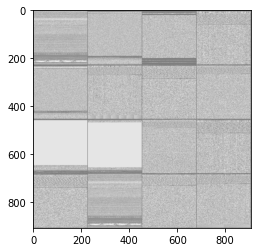

In [ ]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print("".join("%5s "%classes[labels[j]] for j in range(16)))

## 03. Define VAE Class
* Initialize
    * (224, 224) input 이미지를 통해 1차원 100개의 latent vector를 생성하는 Encoder네트워크 정의
    * 100개의 latent vector로부터 X_hat을 복원하는 Decoder Network 정의
* encode
* reparameterize
* decode
* forward

In [13]:
device = torch.device("cuda")  # device = torch.device("cuda")

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.fc1 = nn.Linear(224*224, 1000)
        self.fc21 = nn.Linear(1000, 100)
        self.fc22 = nn.Linear(1000, 100)
        self.fc3 = nn.Linear(100, 1000)
        self.fc4 = nn.Linear(1000, 224*224)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))
# loss값이 안줄면 sigmoid함수를 제거하고 BCE with Logits Loss를 사용해볼까?
# https://nuguziii.github.io/dev/dev-002/

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 224*224))
        z = self.reparameterize(mu, logvar)  # z's shape => (batch_size, 100)
        return self.decode(z), mu, logvar, z

# Post-Exp02.

### Load State Dict
* Exp05_Epoch10
* <code>Exp05_model_save_10Epochs.pth</code>

In [14]:
! pwd

/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp02


In [15]:
# Load State_dict
PATH_State_Dict = './Exp05_model_save_10Epochs.pth'

model = VAE().to(device)
model.load_state_dict(torch.load(PATH_State_Dict))
model.eval

model

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)

In [16]:
print('Num of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

Num of 100704376 parameters


# Skip Below Cells
* Skip Training Cells

======================================= Skip it ===================================================


---

*Note*<br>
✅ Reducing Learning rate<br>
1e-3 to 1e-5

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=1e-5)  # reducing learning rate after 10 Epochs

✅ Update<br>

```
 BCE Loss와 Regulation Loss를 추가해줬습니다. -20.07.22.wed-
```



In [ ]:
! pwd

/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp01


In [ ]:
# track and save train, test loss through Dictionary
# 
Epoch_Loss = {'list_epoch': [],
              'list_train_loss': [],
              'list_test_loss': [],
              # Add BCE Loss & Regularization Loss
              'list_recon_loss': [],  # BCE Loss
              'list_reg_loss': []     # KL Term
            }

# Save & Loading Model for Inference
# Reference: https://pytorch.org/tutorials/beginner/saving_loading_models.html

# PATH = '/Again_original_Exp01_200-Epoch.pth'

PATH = 'Epochs.pth'
# latent_vector = np.zeros((16, 100))
color_palette = np.zeros((1868))

*Note*<br>
* Plot Every Epoch


In [ ]:
# Reconstruction + KL divergence losses summed over all elements and batch
def loss_function(recon_x, x, mu, logvar):

    # BCE - Reconstruction Loss
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 224*224), reduction='sum')  # (input, target, ... reduction)

    # see Appendix B from VAE paper:
    # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
    # https://arxiv.org/abs/1312.6114
    # 0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)

    # KLD Term: Regularization
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())


    # ADD BCE & KLD Loss
    Epoch_Loss['list_recon_loss'].append(BCE)
    Epoch_Loss['list_reg_loss'].append(KLD)
    return BCE + KLD

def train(epoch):
    model.train()
    train_loss = 0
    # latent_vector = np.zeros(())
    # latent_label = 0

    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar, z= model(data)
    
       
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()  # backward를 해주고요
        train_loss += loss.item()  # loss.item() 개꿀...
        optimizer.step()

        # if batch_idx % 10 == 0:
        print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader),
            loss.item() / len(data)))

    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    
    Epoch_Loss['list_epoch'].append(epoch)
    Epoch_Loss['list_train_loss'].append(train_loss / len(train_loader.dataset))
   
def test(epoch):
    # Every Epoch 단위로 작업
    # model.state_dict() 저장 및 latent_vector 저장
    # plot latent vector
    # if epoch % 10 == 0:  # Epoch이 10의 배수일때
    # save model.state_dict() per 10 Epochs
    torch.save(model.state_dict(), ('./model_save_' + str(epoch) + PATH))  # Epoch 단위 parameter 저장

    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            data = data.to(device)
            recon_batch, mu, logvar, z = model(data)
            # z vector는 torch type
            # latent_vector = z.detach().cpu().clone().numpy()

            test_loss += loss_function(recon_batch, data, mu, logvar).item()
            if i == 0:
                n = min(data.size(0), 8)
                comparison = torch.cat([data[:n],
                                    recon_batch.view(16, 1, 224, 224)[:n]])
                save_image(comparison.cpu(),
                        './recon_sampling/reconstruction_' + str(epoch) + '.png', nrow=n)
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    # Epoch_Loss['list_epoch'].append(epoch)
    Epoch_Loss['list_test_loss'].append(test_loss)

    # save latent vector's every 10 Epoch's
    # load_whole test_data 
    for i, (data, _) in enumerate(test_loader_10):  # load_whole test_data
        data = data.to(device)
        recon_batch, mu, logvar, z = model(data)
    # save latent_vector per 10 Epochs
        latent_vector = z.detach().cpu().clone().numpy()  # change tensor type data to cpu().numpy()
                                                            # latent_vector_size: (num_of_data, 100)
        color_palette = _.detach().cpu().clone().numpy()
        with open(('./'+str(10+epoch)+'Epoch_z_vector.npy'), 'wb') as f:
            np.save(f, latent_vector)  # but latent vector size is (16, 100).... just 16...
                                        # 1 Epoch 단위로 latent vector를 저장한다
                                        # 이 떄, latent vector의 size는 test_dataset의 크기가 되어야 한다
                                        # 결과값이 좋은 vector는 좋은 feature로 사용할 수 있다.
    # plot latent vector Every 10 Epochs
    # t-SNE for Dimensionality reduction
    Z_embedded = TSNE(n_components=2).fit_transform(latent_vector)
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # setup the plot

    x = Z_embedded[:, 0]
    y = Z_embedded[:, 1]
    label = color_palette
    # label[10:12] = 0  # make sure there are some 0 values to show up as grey
    print("=="*20, "params", "=="*20)
    print("Z_embedded.shape:", Z_embedded.shape)
    print("label.shape:", label.shape)
    # tsne_data = np.vstack((Z_embedded, label))
    tsne_data = np.c_[Z_embedded, label]
    tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))
    sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.savefig('./plot_latent_vector/' + str(epoch) + '_t_SNE.png', dpi=300)
    plt.show()

*Notice*<br>
Train Again!<br>
Change BCE loss param_reduction to 'sum'

1
Train Epoch: 1 [0/7471 (0%)]	Loss: 31925.111328
Train Epoch: 1 [16/7471 (0%)]	Loss: 31171.705078
Train Epoch: 1 [32/7471 (0%)]	Loss: 32803.324219
Train Epoch: 1 [48/7471 (1%)]	Loss: 31213.982422
Train Epoch: 1 [64/7471 (1%)]	Loss: 32848.988281
Train Epoch: 1 [80/7471 (1%)]	Loss: 30937.785156
Train Epoch: 1 [96/7471 (1%)]	Loss: 31197.062500
Train Epoch: 1 [112/7471 (1%)]	Loss: 32406.113281
Train Epoch: 1 [128/7471 (2%)]	Loss: 31881.794922
Train Epoch: 1 [144/7471 (2%)]	Loss: 33512.074219
Train Epoch: 1 [160/7471 (2%)]	Loss: 31117.408203
Train Epoch: 1 [176/7471 (2%)]	Loss: 30998.169922
Train Epoch: 1 [192/7471 (3%)]	Loss: 30990.775391
Train Epoch: 1 [208/7471 (3%)]	Loss: 32683.599609
Train Epoch: 1 [224/7471 (3%)]	Loss: 32421.382812
Train Epoch: 1 [240/7471 (3%)]	Loss: 32100.914062
Train Epoch: 1 [256/7471 (3%)]	Loss: 33242.398438
Train Epoch: 1 [272/7471 (4%)]	Loss: 32735.517578
Train Epoch: 1 [288/7471 (4%)]	Loss: 32545.660156
Train Epoch: 1 [304/7471 (4%)]	Loss: 33369.800781
Train 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


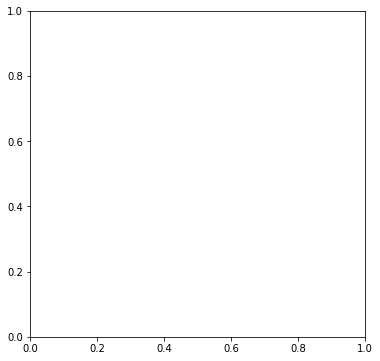

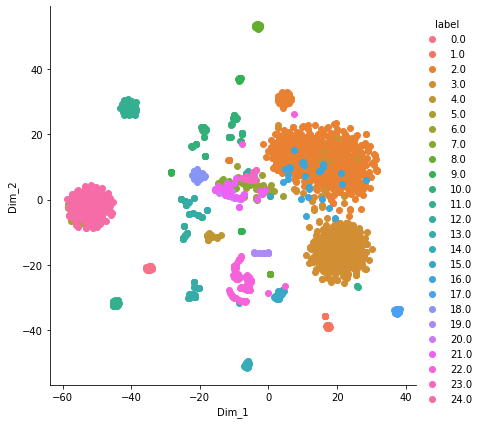

ValueError: ignored

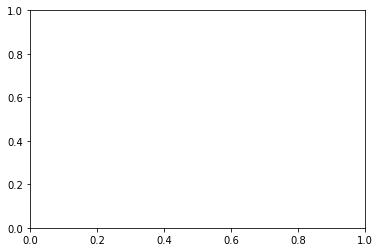

In [ ]:
epochs = 20

for epoch in range(1, epochs + 1):
        print(epoch)
        train(epoch)
        test(epoch)
        # https://stackoverflow.com/questions/40766909/suggestions-to-plot-overlapping-lines-in-matplotlib
        plt.plot(Epoch_Loss['list_epoch'],Epoch_Loss['list_train_loss'], label="train_loss", alpha=0.7)
        plt.plot(Epoch_Loss['list_epoch'],Epoch_Loss['list_test_loss'], label="test_loss", alpha=0.5)
        plt.xlabel('Epochs')
        plt.ylabel('Loss Score')
        plt.title('Train_Test_Loss')
        plt.legend()
        plt.savefig('./plot_train_test_loss/'+str(epoch)+'_epoch.png', dpi=300)
        plt.show()

        with torch.no_grad():
            sample = torch.randn(64, 100).to(device)
            sample = model.decode(sample).cpu()
            save_image(sample.view(64, 1, 224, 224),
                       './recon_sampling/sampling_' + str(epoch) + '.png')

## Post-Exp02
* 추가실험 List
    * Load VAE_State_Dict
    * Extract Latent vector & make Training set(for DL/ML)
        * ❌(1868, 100)
        * => For all training data: (9339, 100)
        * => Add Labels: (9339, 101)
        * Make Pandas DataFrame
            * Make pd.DataFrame()
            * Save DataFrame() to csv
        * Make Classifier
            * ML: Voting Classifier
            * DL: 


## 1. Linear Model(Deep Neural Network)

## 02. Machine Learning Modeling

### Preparing

* Make Custom Dataset & Custom DataLoader
* Load_VAE_State_Dict
* Extract Latent Vector

#### Make Custom Dataset & Custom *DataLoader*

In [18]:
transforms = transforms.Compose([
                                transforms.Resize((224, 224)),                # Change size of Image to (224, 224)
                                transforms.Grayscale(num_output_channels=1),  # Makes it 1-dimension channel
                                transforms.ToTensor(),                        # Convert a PIL Image or numpy.ndarray to tensor.
                                                                              # Converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0] if the PIL Image belongs to one of the modes (L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK, 1) or if the numpy.ndarray has dtype = np.uint8
                                                                              # In the other cases, tensors are returned without scaling.
                                # transforms.Normalize(mean=[0.5], std=[0.5]),
                                
                                ])

# make custom dataset
trainset = torchvision.datasets.ImageFolder(root='../../InformationSecurity_Summer/malimg',
                                            transform=transforms)  # make custom dataset

In [19]:
full_dataset = trainset

# maek train, val, test: 8:1:1
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
print(train_size, val_size, test_size)

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

7471 933 935


In [20]:
print(train_dataset, val_dataset, test_dataset)

<torch.utils.data.dataset.Subset object at 0x7f4282413358> <torch.utils.data.dataset.Subset object at 0x7f4282413208> <torch.utils.data.dataset.Subset object at 0x7f4282413e80>


In [22]:
# 7471 + 933 + 935

In [23]:
# make custom data_loader
train_loader = DataLoader(train_dataset,
                         batch_size=16,
                         shuffle=True,
                         pin_memory=True)
val_loader = DataLoader(val_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)
 
test_loader = DataLoader(test_dataset,
                        batch_size=16,
                        shuffle=True,
                        pin_memory=True)  # Instead, we recommend using automatic memory pinning (i.e., setting pin_memory=True)
                                          #  which enables fast data transfer to CUDA-enabled GPUs

# First, insert all test dataset
# z_loader: for latent vector extraction
z_loader = DataLoader(full_dataset,
                        batch_size=9339,
                        shuffle=True,
                        pin_memory=True)

z_loader: for extract latent vectors<br>
e.g) (9339, 100)

#### Load_VAE_State_Dict

In [24]:
# define_device
device = torch.device("cuda")  # device = torch.device("cuda")

# Load State_dict
PATH_State_Dict = './Exp05_model_save_10Epochs.pth'

model = VAE().to(device)  # VAE().to(device)
model.load_state_dict(torch.load(PATH_State_Dict))
model.eval()

print(model)
print('Num of {} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

VAE(
  (fc1): Linear(in_features=50176, out_features=1000, bias=True)
  (fc21): Linear(in_features=1000, out_features=100, bias=True)
  (fc22): Linear(in_features=1000, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1000, bias=True)
  (fc4): Linear(in_features=1000, out_features=50176, bias=True)
)
Num of 100704376 parameters


#### Extract Latent Vector

In [25]:
for i, (data, _) in enumerate(z_loader):  # load_whole data(9339)
    data = data.to(device)
    recon_batch, mu, logvar, z = model(data)
    # save latent_vector
    latent_vector = z.detach().cpu().clone().numpy()  # change tensor type data to cpu().numpy()
                                                        # latent_vector_size: (num_of_data, 100)
    # save label
    label = _.detach().cpu().clone().numpy()
    label =label.reshape(1, -1)
    print(label.shape)

    # concat_data
    latent_z = np.concatenate((latent_vector, label.T), axis=1)  # latent_z: (9339, 101): (num_data, latent_z + label) 
    print(latent_z.shape)


(1, 9339)
(9339, 101)


NameError: ignored

In [27]:
with open(('./'+str(10+1)+'Epoch_z_vector.npy'), 'wb') as f:
        np.save(f, latent_z)  # but latent vector size is (16, 100).... just 16...
                                    # 1 Epoch 단위로 latent vector를 저장한다
                                    # 이 떄, latent vector의 size는 test_dataset의 크기가 되어야 한다
                                    # 결과값이 좋은 vector는 좋은 feature로 사용할 수 있다.
# plot latent vector Every 10 Epochs
print("Svae Latent vector!")

Svae Latent vector!


### Datapreparation
* make pandas DataFrame
* save pandas dataframe to csv
<br>



next>>
* data scaling
* build model(define hypothesis)
* evaluation



```
11Epoch_z_vector.npy
```



In [28]:
latent_vector = np.load('./11Epoch_z_vector.npy')
print("Load Latent_v!")
print(latent_vector.shape)

data = latent_vector

Load Latent_v!
(9339, 101)


In [29]:
print(data.shape)
print(data[:, 100])

(9339, 101)
[ 7.  3.  2. ...  2. 24. 14.]


In [30]:
# numpy to pandas

import pandas as pd

data = pd.DataFrame(data=data[:, :101])
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-0.074760,2.022230,0.005264,0.392614,-0.181036,-0.369056,-0.223493,-0.806400,-0.522159,-0.863526,-0.332633,0.775755,-0.695117,0.499550,1.331114,1.010958,-1.217542,-0.891008,1.298618,-0.270849,-1.139377,-0.198567,-0.673687,-0.939522,-0.688575,-0.216446,1.283347,1.394188,0.436754,1.491956,0.647735,-1.907286,0.695409,0.496752,0.252555,0.844662,0.994442,0.527004,-0.069175,2.074639,...,-0.045161,1.134621,0.491393,0.331737,-0.923385,0.200713,-0.168143,-0.295930,1.023374,1.422266,1.467682,-0.442953,1.540047,-0.793314,-0.098048,-0.363689,-1.632762,-0.623801,0.204820,0.268576,-0.057341,-0.880265,0.499716,0.022444,1.150154,0.947700,-0.220021,1.836782,0.818549,0.410302,0.503128,0.823758,-1.162378,0.349801,0.135358,-0.380480,-1.025529,2.483093,0.761738,7.0
1,0.570940,1.355570,0.105026,2.382208,-0.421001,-0.251137,-1.256089,-0.081605,0.575721,-0.611078,1.050410,1.616762,-1.213972,-0.868891,-0.805596,1.750196,-1.986394,-0.687034,-1.014709,0.472611,-1.651651,-0.136497,-0.599357,0.035993,-0.385072,-0.072630,1.758502,-1.442734,-0.488999,1.340759,-0.206022,-2.262341,-0.838148,0.204638,1.830359,-1.756884,1.968087,0.105983,-0.933381,2.854934,...,-0.283615,0.665029,-1.046107,0.905249,0.208101,-0.098505,-0.242531,-1.409439,1.884905,-0.161235,0.377333,0.232317,-0.222511,-0.197332,-2.173722,-2.001394,-1.578223,1.982911,-0.843730,0.328692,2.366330,0.573370,2.370511,0.124766,-0.318144,-0.366861,0.881986,-0.965351,0.707636,-0.615570,-0.830268,0.957833,-0.882062,-0.307394,0.492823,1.017216,-1.182661,-0.782644,-0.187560,3.0
2,2.292550,0.072045,0.844364,0.300852,-0.712505,-0.031150,-1.641721,-1.326200,0.468264,0.405294,0.274585,0.734321,-1.259570,-0.710230,0.620657,-0.604613,-1.502707,-0.846367,-0.289415,0.621050,0.164390,-0.636665,0.123245,-1.642753,0.341759,0.269346,-0.417853,-0.327364,0.346950,-0.343290,-0.870022,-2.237232,-1.001039,0.332311,0.308614,0.303245,1.927465,0.360988,-1.312021,2.855052,...,-1.863498,0.764056,-0.806759,1.470122,0.078139,-0.287304,0.554923,1.620703,1.553455,0.890862,0.328180,0.058832,-0.548805,-1.027731,-0.848426,0.078214,-0.722003,0.630865,-1.226391,0.392899,1.764031,0.025501,1.249633,0.055706,-1.209505,-0.823930,-0.755709,-1.667844,-0.530449,-0.121031,-0.243825,1.972044,0.710414,-0.185604,0.622770,-0.601778,-0.272074,1.796188,0.707452,2.0
3,-0.366257,0.230313,-0.684654,1.186263,-0.869948,0.027598,0.216340,-0.912180,0.685560,-0.748203,1.041265,1.858537,0.393133,-0.336696,-1.497047,0.672229,-1.200527,-0.784271,-0.051274,-0.142332,-0.622586,0.820196,-0.728867,-1.261010,0.080103,-0.134554,0.030223,-0.549437,-0.926755,-0.197334,0.596474,-1.475972,-1.531234,-1.742186,-0.263101,-0.330866,1.508977,1.013103,0.262295,2.951676,...,-0.447134,0.939994,-0.528569,0.295357,1.007292,-1.410107,-0.549462,-0.839898,1.580592,0.526468,1.213918,1.710415,0.104702,-0.591928,-2.075770,-0.689329,-1.475914,0.928908,-0.693722,-0.120317,1.701780,-0.189897,0.634573,0.078916,0.625399,-1.398061,1.101900,-0.179323,1.081376,0.486084,-0.229846,0.954376,-0.954479,-0.760801,1.614972,-1.063161,-0.848987,-0.328555,-1.058898,3.0
4,-0.899964,-1.596224,1.688782,1.025586,-1.451643,-0.427293,-0.525212,-1.822712,-0.458857,-0.987899,-1.426500,1.793921,0.550701,0.433661,-0.740163,-1.197379,-2.953953,-1.603912,-2.593912,-1.078439,-1.405706,1.938449,-2.679231,-1.989452,-0.012602,-2.240786,-1.535346,0.294434,1.825396,1.283387,0.122752,0.403363,0.233870,-0.737338,-1.044760,-0.948965,-0.763444,1.036627,2.480093,0.252194,...,-0.155172,1.899592,1.051491,2.833673,-1.802613,-0.095620,-1.839952,-0.321125,0.991234,-0.055728,1.655902,-0.597439,-0.337931,-0.208908,0.111292,1.563351,-2.186515,-1.224082,1.141217,-0.566647,-1.134578,2.934387,2.998872,0.130571,0.524407,2.324645,2.087171,-0.442157,1.521167,0.421690,2.081017,1.108058,0.484758,0.672354,1.29072

Save pandas DataFrame to csv

In [31]:
data.to_csv('./latent_dataset.csv', index=False)
df = pd.read_csv('./latent_dataset.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-0.074760,2.022230,0.005264,0.392614,-0.181036,-0.369056,-0.223493,-0.806400,-0.522159,-0.863526,-0.332633,0.775755,-0.695117,0.499550,1.331114,1.010958,-1.217542,-0.891008,1.298618,-0.270849,-1.139377,-0.198567,-0.673687,-0.939522,-0.688575,-0.216446,1.283347,1.394188,0.436754,1.491956,0.647735,-1.907286,0.695409,0.496752,0.252555,0.844662,0.994442,0.527004,-0.069175,2.074639,...,-0.045161,1.134621,0.491393,0.331737,-0.923385,0.200713,-0.168143,-0.295930,1.023374,1.422266,1.467682,-0.442953,1.540047,-0.793314,-0.098048,-0.363689,-1.632762,-0.623801,0.204820,0.268576,-0.057341,-0.880265,0.499716,0.022444,1.150154,0.947700,-0.220021,1.836782,0.818549,0.410302,0.503128,0.823758,-1.162378,0.349801,0.135358,-0.380480,-1.025529,2.483093,0.761738,7.0
1,0.570940,1.355570,0.105026,2.382208,-0.421001,-0.251137,-1.256089,-0.081605,0.575721,-0.611078,1.050410,1.616762,-1.213972,-0.868891,-0.805596,1.750196,-1.986394,-0.687034,-1.014709,0.472611,-1.651651,-0.136497,-0.599357,0.035993,-0.385072,-0.072630,1.758502,-1.442734,-0.488999,1.340759,-0.206022,-2.262341,-0.838148,0.204638,1.830359,-1.756884,1.968087,0.105983,-0.933381,2.854934,...,-0.283615,0.665029,-1.046107,0.905249,0.208101,-0.098505,-0.242531,-1.409439,1.884905,-0.161235,0.377333,0.232317,-0.222511,-0.197332,-2.173722,-2.001394,-1.578223,1.982911,-0.843730,0.328692,2.366330,0.573370,2.370511,0.124766,-0.318144,-0.366861,0.881986,-0.965351,0.707636,-0.615570,-0.830268,0.957833,-0.882062,-0.307394,0.492823,1.017216,-1.182661,-0.782644,-0.187560,3.0
2,2.292550,0.072045,0.844364,0.300852,-0.712505,-0.031150,-1.641721,-1.326200,0.468264,0.405294,0.274585,0.734321,-1.259570,-0.710230,0.620657,-0.604613,-1.502707,-0.846367,-0.289415,0.621050,0.164390,-0.636665,0.123245,-1.642753,0.341759,0.269346,-0.417853,-0.327364,0.346950,-0.343290,-0.870022,-2.237232,-1.001039,0.332311,0.308614,0.303245,1.927465,0.360988,-1.312021,2.855052,...,-1.863498,0.764056,-0.806759,1.470122,0.078139,-0.287304,0.554923,1.620703,1.553455,0.890862,0.328180,0.058832,-0.548805,-1.027731,-0.848426,0.078214,-0.722003,0.630865,-1.226391,0.392899,1.764031,0.025501,1.249633,0.055706,-1.209505,-0.823930,-0.755709,-1.667844,-0.530449,-0.121031,-0.243825,1.972044,0.710414,-0.185604,0.622770,-0.601778,-0.272074,1.796188,0.707452,2.0
3,-0.366257,0.230313,-0.684654,1.186263,-0.869948,0.027598,0.216340,-0.912180,0.685560,-0.748203,1.041265,1.858537,0.393133,-0.336696,-1.497047,0.672229,-1.200527,-0.784271,-0.051274,-0.142332,-0.622586,0.820196,-0.728867,-1.261010,0.080103,-0.134554,0.030223,-0.549437,-0.926755,-0.197334,0.596474,-1.475972,-1.531234,-1.742186,-0.263101,-0.330866,1.508977,1.013103,0.262295,2.951676,...,-0.447134,0.939994,-0.528569,0.295357,1.007292,-1.410107,-0.549462,-0.839898,1.580592,0.526468,1.213918,1.710415,0.104702,-0.591928,-2.075770,-0.689329,-1.475914,0.928908,-0.693722,-0.120317,1.701780,-0.189897,0.634573,0.078916,0.625399,-1.398061,1.101900,-0.179323,1.081376,0.486084,-0.229846,0.954376,-0.954479,-0.760801,1.614972,-1.063161,-0.848987,-0.328555,-1.058898,3.0
4,-0.899964,-1.596224,1.688782,1.025586,-1.451643,-0.427293,-0.525212,-1.822712,-0.458857,-0.987899,-1.426500,1.793921,0.550701,0.433661,-0.740163,-1.197379,-2.953953,-1.603912,-2.593912,-1.078439,-1.405706,1.938449,-2.679231,-1.989452,-0.012602,-2.240786,-1.535346,0.294434,1.825396,1.283387,0.122752,0.403363,0.233870,-0.737338,-1.044760,-0.948965,-0.763444,1.036627,2.480093,0.252194,...,-0.155172,1.899592,1.051491,2.833673,-1.802613,-0.095620,-1.839952,-0.321125,0.991234,-0.055728,1.655902,-0.597439,-0.337931,-0.208908,0.111292,1.563351,-2.186515,-1.224082,1.141217,-0.566647,-1.134578,2.934387,2.998872,0.130571,0.524407,2.324645,2.087171,-0.442157,1.521167,0.421690,2.081017,1.108058,0.484758,0.672354,1.29072

In [32]:
df.shape

(9339, 101)

---
# Before Preprocessing
* -20.07.24.Thur.pm:10:53-

---


In [53]:
# Test-Voting classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# iris = datasets.load_iris()
data = latent_vector  # re-change it to numpy
X, y = data[:, 0:100], data[:, 100]

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
         estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
         voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.93 (+/- 0.01) [Logistic Regression]
Accuracy: 0.94 (+/- 0.00) [Random Forest]
Accuracy: 0.93 (+/- 0.00) [naive Bayes]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.94 (+/- 0.00) [Ensemble]


### Data Preprocessing


Divide Data & Label<br>
change dataframe to numpy


In [44]:
df = df.to_numpy()
df.shape

(9339, 101)

In [52]:
# make data & label variable
data = df[:, :100]
label = df[:, 100]

print(data.shape, label.shape)

(9339, 100) (9339,)


Build Model
* data scaling


* Reference: Good Resource! - toward D.S
    * https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
<br><br>



* Wrap
    * Use MinMaxScaler as the default if you are transforming a feature. It’s non-distorting.
    * You could use RobustScaler if you have outliers and want to reduce their influence. However, you might be better off removing the outliers, instead.
    * Use StandardScaler if you need a relatively normal distribution.
    * Use Normalizer sparingly — it normalizes sample rows, not feature columns. It can use l2 or l1 normalization.

1st. Minmax Scaler


In [51]:
# sklearn.preprocessing.MinMaxSclaer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax%20scaler#sklearn.preprocessing.MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
data = data
scaler = MinMaxScaler()  # make scaler obj

# directly fit_transform?
print(scaler.fit_transform(data))

[[0.45336022 0.63622903 0.56358312 ... 0.5694765  0.68342398 0.60632197]
 [0.53180541 0.54746212 0.57470655 ... 0.55145253 0.26585075 0.49761365]
 [0.7409615  0.3765586  0.65714246 ... 0.65590229 0.595593   0.60010551]
 ...
 [0.70343739 0.55240322 0.60204721 ... 0.56925473 0.40496521 0.68498748]
 [0.49168533 0.54621097 0.51954767 ... 0.78756417 0.25227082 0.49295863]
 [0.66771601 0.53583113 0.67377908 ... 0.54747083 0.49395586 0.56545021]]


classify it

In [ ]:
# Test-Voting classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# iris = datasets.load_iris()
data = latent_vector  # re-change it to numpy
X, y = data[:, 0:100], data[:, 100]

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
         estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
         voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


2. Standard Scaler


3. Robust Scaler

### Modeling
* voting classifier


In [ ]:
# Test-Voting classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# iris = datasets.load_iris()
data = latent_vector  # re-change it to numpy
X, y = data[:, 0:100], data[:, 100]

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
         estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
         voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


In [ ]:
! pwd

/content/drive/My Drive/Post_InfoSec_Exps/Post_Exp01


In [ ]:
latent_vector = np.load('./11Epoch_z_vector.npy')
print(latent_vector.shape)

OSError: ignored

In [ ]:
# numpy to pandas

import pandas as pd

data = pd.DataFrame(data=latent_vector[:, :101])
data.head()

NameError: ignored

In [ ]:
# Test-Voting classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# iris = datasets.load_iris()
data = latent_vector  # re-change it to numpy
X, y = data[:, 0:100], data[:, 100]

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(
         estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
         voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
     scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.93 (+/- 0.00) [Logistic Regression]
Accuracy: 0.94 (+/- 0.00) [Random Forest]
Accuracy: 0.93 (+/- 0.00) [naive Bayes]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy: 0.94 (+/- 0.00) [Ensemble]
